In [115]:
import numpy as np
import pandas as pd
import statistics as sts
import seaborn as srn
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv("Book(VENDAS).csv", sep=';', encoding='utf-8')
df.head()

,ISBN,DATA,N-NF,AUTOR,TITULO,Editora,EXEMPLARES,PREÇO VENDA,TOTAL,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.788571e+12,05/06/2024,1.0,ALICE KRIEG-PLANQUE,ANALISAR DISCURSOS INSTITUCIONAIS,EDUFU,1.0,"R$ 50,00","R$ 50,00",NaN
2,9.786558e+12,09/07/2024,2.0,ANSELMO TADEU FERREIRA,"A NOCAO DE ALMA NA ""SUMA DE TEOLOGIA"" DE TOMAS...",EDUFU,2.0,"R$ 30,00","R$ 60,00",NaN
3,9.786558e+12,06/06/2024,2.0,RAQUEL DISCINI DE CAMPOS,A EDUCACAO ENTRE A ETICA E A ESTETICA: OS ALBU...,EDUFU,1.0,"R$ 50,00","R$ 50,00",NaN
4,9.786558e+12,09/07/2024,3.0,ANSELMO TADEU FERREIRA,"A NOCAO DE ALMA NA ""SUMA DE TEOLOGIA"" DE TOMAS...",EDUFU,1.0,"R$ 30,00","R$ 30,00",NaN


In [117]:
print(df.shape)
print(df.columns)

(799, 10)
Index(['ISBN', 'DATA', 'N-NF', 'AUTOR', 'TITULO', 'Editora', 'EXEMPLARES',
       ' PREÇO VENDA ', 'TOTAL', 'Unnamed: 9'],
      dtype='object')


In [118]:
df.isna().sum()

ISBN             259
DATA             259
N-NF             259
AUTOR            259
TITULO           259
Editora          259
EXEMPLARES       259
 PREÇO VENDA     259
TOTAL            259
Unnamed: 9       799
dtype: int64

In [119]:
df.drop(df.columns[9],axis=1, inplace=True)
df.head()

,ISBN,DATA,N-NF,AUTOR,TITULO,Editora,EXEMPLARES,PREÇO VENDA,TOTAL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.788571e+12,05/06/2024,1.0,ALICE KRIEG-PLANQUE,ANALISAR DISCURSOS INSTITUCIONAIS,EDUFU,1.0,"R$ 50,00","R$ 50,00"
2,9.786558e+12,09/07/2024,2.0,ANSELMO TADEU FERREIRA,"A NOCAO DE ALMA NA ""SUMA DE TEOLOGIA"" DE TOMAS...",EDUFU,2.0,"R$ 30,00","R$ 60,00"
3,9.786558e+12,06/06/2024,2.0,RAQUEL DISCINI DE CAMPOS,A EDUCACAO ENTRE A ETICA E A ESTETICA: OS ALBU...,EDUFU,1.0,"R$ 50,00","R$ 50,00"
4,9.786558e+12,09/07/2024,3.0,ANSELMO TADEU FERREIRA,"A NOCAO DE ALMA NA ""SUMA DE TEOLOGIA"" DE TOMAS...",EDUFU,1.0,"R$ 30,00","R$ 30,00"


In [120]:
df.dropna(inplace=True)
df.isna().sum()

ISBN             0
DATA             0
N-NF             0
AUTOR            0
TITULO           0
Editora          0
EXEMPLARES       0
 PREÇO VENDA     0
TOTAL            0
dtype: int64

In [121]:
df.drop(df.columns[3],axis=1, inplace=True)
df.drop(df.columns[3],axis=1, inplace=True)



In [122]:
df.head()

,ISBN,DATA,N-NF,Editora,EXEMPLARES,PREÇO VENDA,TOTAL
1,9.788571e+12,05/06/2024,1.0,EDUFU,1.0,"R$ 50,00","R$ 50,00"
2,9.786558e+12,09/07/2024,2.0,EDUFU,2.0,"R$ 30,00","R$ 60,00"
3,9.786558e+12,06/06/2024,2.0,EDUFU,1.0,"R$ 50,00","R$ 50,00"
4,9.786558e+12,09/07/2024,3.0,EDUFU,1.0,"R$ 30,00","R$ 30,00"
5,9.786588e+12,01/07/2024,4.0,EDUFU,1.0,"R$ 56,67","R$ 56,67"


In [ ]:
df["DATA"] = pd.to_datetime(df["DATA"], dayfirst=True)



AttributeError: Rectangle.set() got an unexpected keyword argument 'kde'

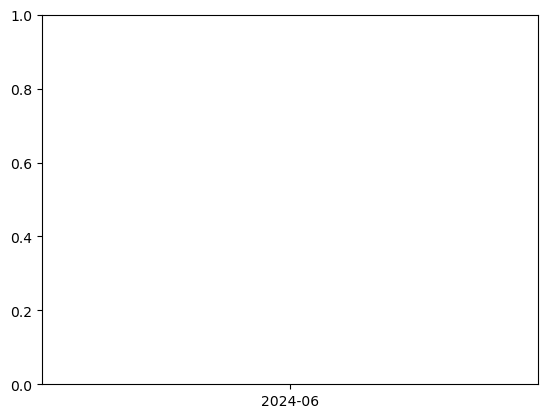

In [160]:
g = df.groupby(df["DATA"].dt.to_period("M")).size().sort_index()
srn.barplot(g,kde=True)

In [135]:
g1 = df.groupby(df["Editora"]).size()
g1

Editora
EDUFU     336
MADAMU      3
PONTES      8
UFMG       54
UNESP     139
dtype: int64

<Axes: xlabel='Editora'>

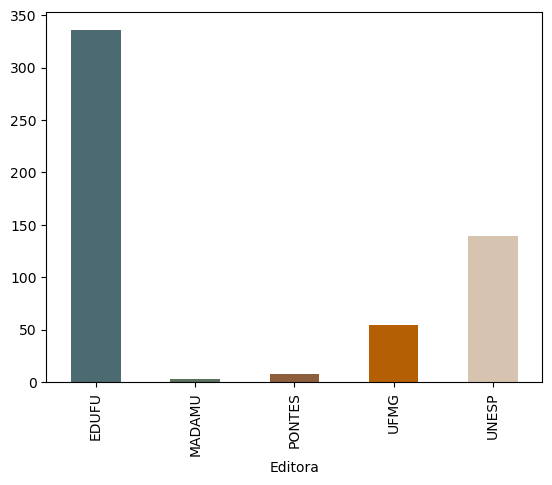

In [143]:
g1.plot.bar(color= ['#4C6A71', '#5C715E', '#8C5E3C', '#B45F04', '#D6C4B0'])

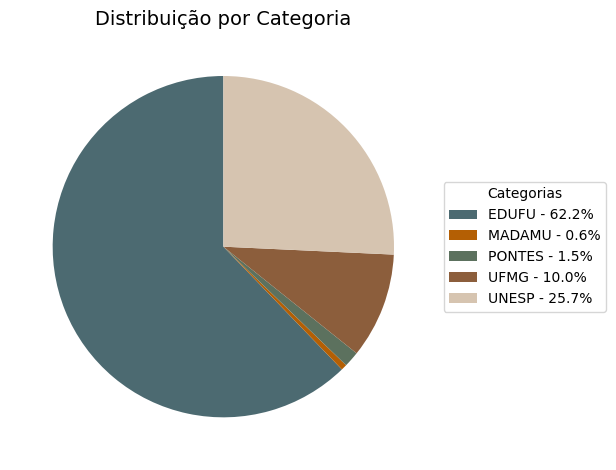

In [156]:

# Total geral
total = g1.sum()

# Criar a legenda direto da Series
legenda = [f"{categoria} - {valor/total:.1%}" for categoria, valor in g1.items()]

# Plot
fig, ax = plt.subplots()
ax.pie(g1.values, labels=None, colors=['#4C6A71', '#B45F04', '#5C715E', '#8C5E3C', '#D6C4B0'], startangle=90)

# Legenda lateral com nomes e porcentagens
ax.legend(legenda, loc='center left', bbox_to_anchor=(1, 0.5), title="Categorias")

# Título bonitinho
ax.set_title("Distribuição por Categoria", fontsize=14)

plt.tight_layout()
plt.show()
